# Análise de Mídias Sociais: Twitter

Para autenticar no twitter, temos que criar uma conta e accessar: <br />
http://twitter.com/apps/ <br />
Gerar as chaves de autenticação, ex:<br />
CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA' <br />
CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N' <br />
OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7' <br />
OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU' <br />

## Modulo para autenticação no twitter

In [4]:
import twitter

def oauth_login():
    # XXX: Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'Riew8e4LKVoEJ51HbeOm6wsYA'
    CONSUMER_SECRET = '3pPE1z3kTJGQiY93yCqgLUTURJO2wOcoQCcMbyMbCj4Gm9Hc6N'
    OAUTH_TOKEN = '2904474861-kdalTd2NVus3q0PdvAiD3gB2IlF9IFZzao01ol7'
    OAUTH_TOKEN_SECRET = '2yHMlMAEUZflpw5swYaLA8EjFyPyPJWnJT84VJoAHDKCU'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

# Sample usage
twitter_api = oauth_login()    

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

## Módulo para buscar tweets, dado uma palavra

In [5]:
def twitter_search(twitter_api, q, max_results=1000, **kw):  #max_results=200

    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets and 
    # https://dev.twitter.com/docs/using-search for details on advanced 
    # search criteria that may be useful for keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)   # count=100
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://dev.twitter.com/docs/rate-limiting/1.1/limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(1000, max_results)
    
    for _ in range(10): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

## Salvando/Recuperando no MongoDB

In [6]:
import json
import pymongo # pip install pymongo


def save_to_mongo(data, mongo_db, mongo_db_coll, **mongo_conn_kw):
    
    # Connects to the MongoDB server running on 
    # localhost:27017 by default
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    
    # Get a reference to a particular database
    
    db = client[mongo_db]
    
    # Reference a particular collection in the database
    
    coll = db[mongo_db_coll]
    
    # Perform a bulk insert and  return the IDs
    
    return coll.insert_many(data)

def load_from_mongo(mongo_db, mongo_db_coll, return_cursor=False,
                    criteria=None, projection=None, **mongo_conn_kw):
    
    # Optionally, use criteria and projection to limit the data that is 
    # returned as documented in 
    # http://docs.mongodb.org/manual/reference/method/db.collection.find/
    
    # Consider leveraging MongoDB's aggregations framework for more 
    # sophisticated queries.
    
    client = pymongo.MongoClient(**mongo_conn_kw)
    db = client[mongo_db]
    coll = db[mongo_db_coll]
    
    if criteria is None:
        criteria = {}
    
    if projection is None:
        cursor = coll.find(criteria)
    else:
        cursor = coll.find(criteria, projection)

    # Returning a cursor is recommended for large amounts of data
    
    if return_cursor:
        return cursor
    else:
        return [ item for item in cursor ]

## Capturando tweets

In [7]:
q = 'tesla'

twitter_api = oauth_login()
results = []
for i in range(20):
    result = twitter_search(twitter_api, q, max_results=1000)
    print ('capturando ', len(result),' tweets...')
    #results.append(result)
    results += result
#print(type(result))
#print(type(results))
print("Numero de tweets capturados: ", len(results))

#results = twitter_search(twitter_api, q, max_results=1000)
#save_to_mongo(results, 'tweets', q)

capturando  997  tweets...
capturando  998  tweets...
capturando  997  tweets...
capturando  999  tweets...
capturando  195  tweets...
capturando  195  tweets...
capturando  195  tweets...
capturando  196  tweets...
capturando  196  tweets...
capturando  197  tweets...
capturando  199  tweets...
capturando  199  tweets...
capturando  199  tweets...
capturando  198  tweets...
capturando  198  tweets...
capturando  199  tweets...
capturando  199  tweets...
capturando  199  tweets...
capturando  199  tweets...
capturando  199  tweets...
Numero de tweets capturados:  7153


## imprimindo tweets

In [8]:
i = 0
for tweet in results:
    print(tweet['created_at'], ' >> ', tweet['text']) #, " >> ") #, tweet['place'])
    i += 1
    if i > 10:
          break

Thu Apr 05 18:28:48 +0000 2018  >>  RT @ylang__ylang__: Nikola Tesla predicted way back in the 1920s that this would happen and that it would transform the world into a huge b…
Thu Apr 05 18:28:43 +0000 2018  >>  @hinazp I'll rent #Tesla 😂🤘 aaja meri gaadi me baith ja
Thu Apr 05 18:28:40 +0000 2018  >>  RT @EverCharge: Does Tesla Actually Have a Production Problem? Maybe Not... https://t.co/gwJPJrpAxb https://t.co/jS2jDukfUe
Thu Apr 05 18:28:38 +0000 2018  >>  RT @BrelandTLogan: This girl drives a Tesla, wants to pick me up and pay for my food and flirting like she want some pipe... I encourage al…
Thu Apr 05 18:28:37 +0000 2018  >>  RT @historylvrsclub: Nikola Tesla in his lab https://t.co/PKycCnsTeL
Thu Apr 05 18:28:36 +0000 2018  >>  I’m gonna go out on a limb here, but I think you just may be driving a Tesla. #lookatme https://t.co/jRVDVovPs8
Thu Apr 05 18:28:35 +0000 2018  >>  Tesla hit hard by new Chinese tariffs https://t.co/NkT13NpqyH
Thu Apr 05 18:28:32 +0000 2018  >>  RT @ham

## Nuvem de Palavras - tweet

### Stopwords

In [9]:
# instalando o módulo de stopwords
#!pip install stop-words

In [10]:
from stop_words import get_stop_words
stop_words_english = get_stop_words('en')
#stop_words
stop_words_portugues = get_stop_words('pt')
#stop_words_portugues
stop_words = stop_words_english + stop_words_portugues
print(stop_words[:10])
print(stop_words[-10:])

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and']
['tém', 'tínhamos', 'um', 'uma', 'você', 'vocês', 'vos', 'à', 'às', 'éramos']


In [11]:
# nuvem de palavras
from wordcloud import WordCloud, STOPWORDS
import re

stext = ""
for tweet in results:
    if 'text' in tweet:
        stext = stext + tweet['text']
stext = stext.lower()

# retirando pontuações e outros caracteres não relevantes
stext = "".join([i for i in stext if ord(i)<128])
stext = stext.replace("http://","")
stext = stext.replace("https://","")
stext = stext.replace("https","")
stext = stext.replace(",","")
stext = stext.replace(".","")
stext = stext.replace("?","")
stext = stext.replace("!","")
stext = stext.replace("#","")
stext = stext.replace("@","")
stext = stext.replace("'","")


# retirando as stopwords dos tweets
for word in stop_words:
    my_regex = r"\b(?=\w)" + re.escape(word) + r"\b(?!\w)"
    stext = re.sub(my_regex,"" ,stext)

print(len(stext))


# Generate a word cloud image
wordcloud = WordCloud().generate(stext)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(stext)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

686734


## Estatistica de contagem de palavras

In [12]:
words = stext.split()

In [13]:
from collections import Counter

c = Counter(words)
#print (c.most_common()[:30])
most_common = c.most_common()[:40]

for i in most_common:
    print (i[0])
#for item in words:  #[words, screen_names, hashtags]:
#    c = Counter(item)
#    print (c.most_common()[:20]) # top 10
#    print 

tesla
model
-
autopilot
3
another
nearly
crashes
driver
location
died
elon
drudge_report:
musk
need
teslas
can
car
&amp;
just
nikola
elonmusk
help
show
best
billion
new
now
electric
cars
|
much
will
motor
elonmusk:
see
know
tco/4co9dejxxbrt
performance
dont


In [14]:
print (c)

Counter({'tesla': 4604, 'model': 934, '-': 893, 'autopilot': 744, '3': 730, 'another': 534, 'nearly': 466, 'crashes': 458, 'driver': 450, 'location': 446, 'died': 442, 'elon': 387, 'drudge_report:': 378, 'musk': 312, 'need': 311, 'teslas': 307, 'can': 295, 'car': 284, '&amp;': 272, 'just': 268, 'nikola': 265, 'elonmusk': 263, 'help': 254, 'show': 252, 'best': 238, 'billion': 237, 'new': 235, 'now': 235, 'electric': 232, 'cars': 227, '|': 223, 'much': 219, 'will': 215, 'motor': 205, 'elonmusk:': 201, 'see': 198, 'know': 196, 'tco/4co9dejxxbrt': 196, 'performance': 185, 'dont': 184, 'twitter': 181, 'brags': 181, '$8': 181, 'internet': 179, 'break': 179, 'via': 179, 'deposit-shames': 177, 'preorders': 177, 'production': 175, 'easter': 175, 'eggs': 175, 'whole': 172, 'x': 172, 'air': 169, 'back': 166, 'ok': 163, 'lets': 163, 'thanks': 163, 'every': 160, 'easy': 160, 'roadshow': 157, 'like': 156, 'la': 156, 'nfrisbie83:': 155, 'worldrecord': 155, 'bitcoin': 155, 'cram': 155, 'wallet': 155, 

## colocando as palavras e suas frequencias do twitter num dataframe

In [15]:
import pandas as pd
df = pd.DataFrame(([word, freq] for word, freq in most_common), columns=['Word', 'Frequency'])
df

,Word,Frequency
0,tesla,4604
1,model,934
2,-,893
3,autopilot,744
4,3,730
5,another,534
6,nearly,466
7,crashes,458
8,driver,450
9,location,446


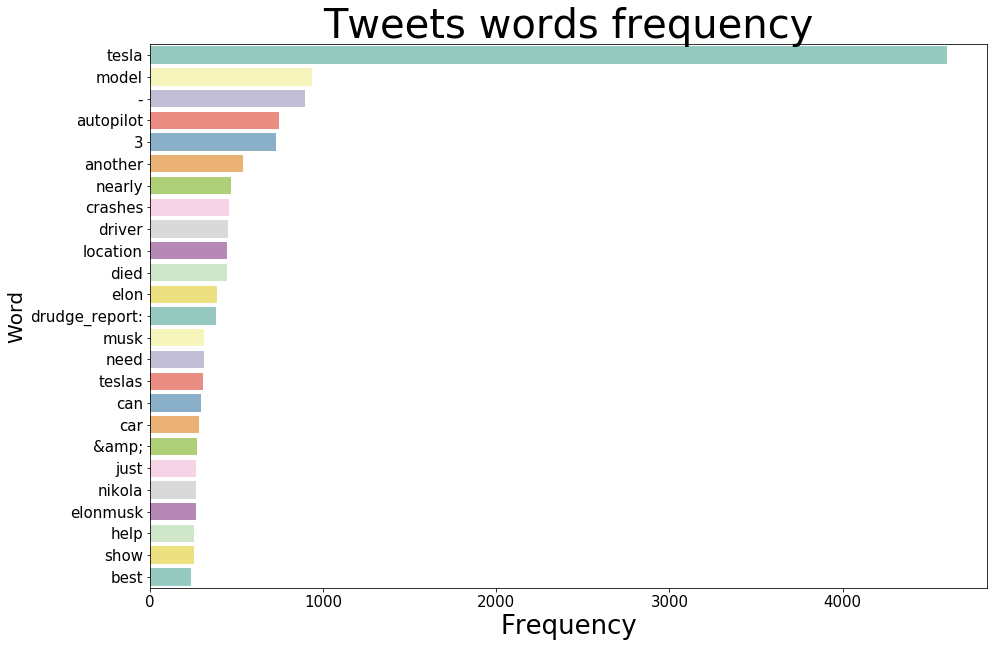

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:25]

ax = sns.barplot(y='Word', x = 'Frequency', data=df2, palette="Set3" )
#sns.despine()
ax.set(xlabel='Tweets words frequency', ylabel='Word')
#ax.set(xticks=range(1, 9), xticklabels=list([10,20,30,40,50,60,70,80,90]))

#ax.set(xticklabels=list(range(0,90,10)))
#plt.figure(figsize=(20,10))

ax.axes.set_title("Tweets words frequency",fontsize=40)
ax.set_xlabel("Frequency",fontsize=26)
ax.set_ylabel("Word",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## achar os países de onde foram gerados os tweets

In [17]:
place = []
for result in results:
    if 'place'in result and result['place']:
        place.append(result['place']['country'])
place = set(place)
print(len(place) )
print(place)

6
{'Mexico', 'The Netherlands', 'Ireland', 'Canada', 'France', 'United States'}


In [18]:
# cidades
place = []
for result in results:
    if 'user'  in result:
        place.append(result['user']['location'])
location = set(place)
len(location)

489

In [19]:
print(location)

{'', 'La Plata ', 'Agâh Beyoğlu ', 'Silicon Valley', 'Aan de kant van het zwembad mijmerend over innovatie in Nederland', 'Sweet Home Pennsyltucky', 'Nassau🇧🇸', '3rd Stone from the Sun', 'internet, Switzerland', 'Los Angeles, CA', 'Toronto, ON', 'Turlock, CA', 'Georgia, USA', 'London, United Kingdom', 'Paderborn/Germany', 'Pontiac, MI', 'Pune, India', 'Englewood, CO', '東京 千代田区', 'Maryland', 'Torrey Pines, San Diego', 'Mesa AZ', 'Montana', 'Charleston, WV, USA', 'Paris, France', 'Wuppertal - Germany', 'Illinois, USA', 'Grand Casablanca, Royaume du Maroc', 'Brussels', 'Ann Arbor, MI', 'Cartago, Costa Rica', 'Vancouver, Canada', 'Boynton Beach, FL', 'Samsun', 'Utah', 'Mount Airy, NC', 'Portland, OR', 'Vermont', 'Toronto, Canada', 'Burnaby, BC', '1 AU', 'Vancouver and London', 'The Earth', 'Austin, MN', 'Lubbock, TX', 'República de Catalunya', 'To many places 🤷🏾\u200d♂️', 'Indianapolis, IN', 'Kansas City, MO', 'Colorado Springs, CO', 'UK', 'South East UK', 'Riyadh', 'here, there and everyw

## contar a ocorrencia de cada cidade

In [20]:
from collections import Counter

c = Counter(location)
#print(c)
cidades = c.items()

## colocando as cidades, frequencia num dataframe e salvando no excel

In [21]:
import pandas as pd
df = pd.DataFrame(([cidade, freq] for cidade, freq in cidades), columns=['city', 'frequency'])

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cidades.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
df

,city,frequency
0,,1
1,La Plata,1
2,Agâh Beyoğlu,1
3,Silicon Valley,1
4,Aan de kant van het zwembad mijmerend over inn...,1
5,Sweet Home Pennsyltucky,1
6,Nassau🇧🇸,1
7,3rd Stone from the Sun,1
8,"internet, Switzerland",1
9,"Los Angeles, CA",1


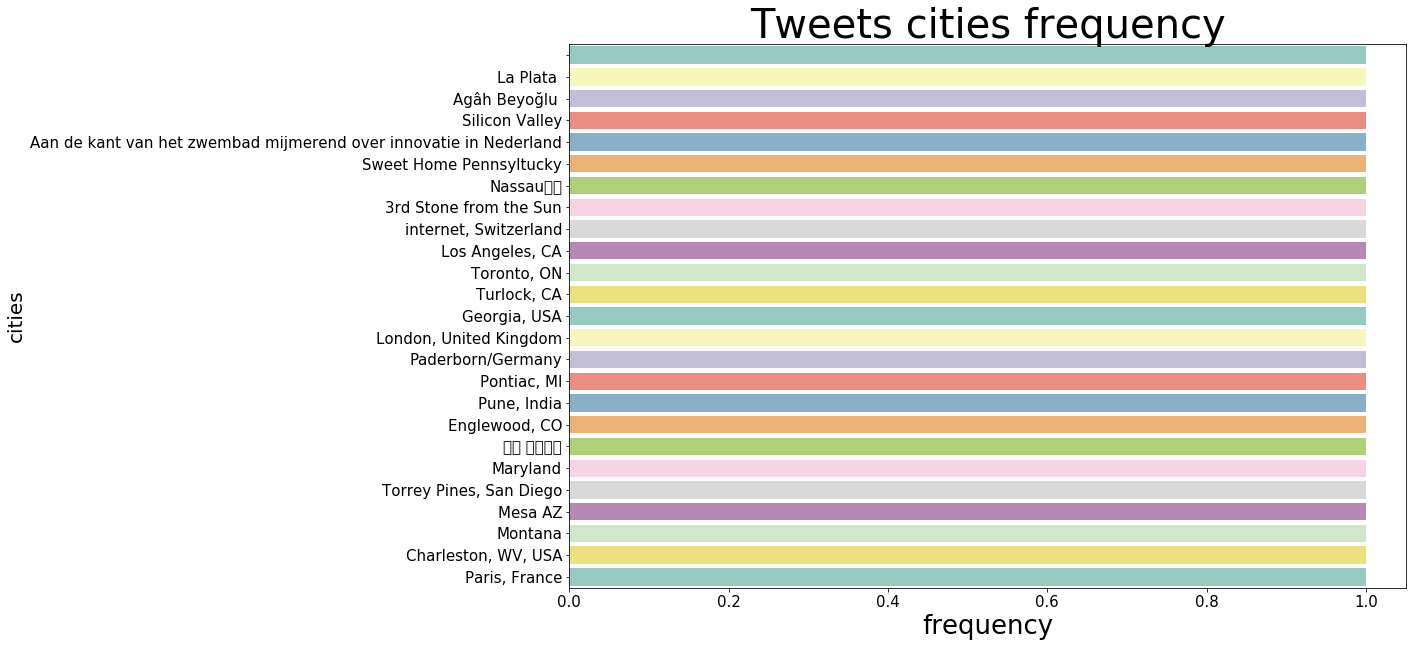

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)

df2 = df[:25]

ax = sns.barplot(y='city', x = 'frequency', data=df2, palette="Set3" )
ax.set(xlabel='Tweets cities frequency', ylabel='cities')
ax.axes.set_title("Tweets cities frequency",fontsize=40)
ax.set_xlabel("frequency",fontsize=26)
ax.set_ylabel("cities",fontsize=20)
ax.tick_params(labelsize=15)
#sns.plt.show()
plt.show()

## Capturar tweets com coodenadas de lat, long para cidade

In [23]:
def captura_tweets_com_coordenadas(tweets):
    tweets_com_coordenadas = []
    for tweet in tweets:
        if tweet['place'] is not None:
            tweets_com_coordenadas.append(tweet)
    return (tweets_com_coordenadas)

In [24]:
tweets_com_coordenadas = captura_tweets_com_coordenadas(results)
print(len(tweets_com_coordenadas))

154


In [26]:
tweets_com_coordenadas[0]['place']['bounding_box']

{'coordinates': [[[-75.066178, 39.915333],
   [-75.013523, 39.915333],
   [-75.013523, 39.946809],
   [-75.066178, 39.946809]]],
 'type': 'Polygon'}

In [27]:
tweets_com_coordenadas[0]['place']['bounding_box']['coordinates']

[[[-75.066178, 39.915333],
  [-75.013523, 39.915333],
  [-75.013523, 39.946809],
  [-75.066178, 39.946809]]]

In [29]:
tweets_com_coordenadas[0]['place']['bounding_box']['coordinates'][0][0]

[-75.066178, 39.915333]

In [30]:
def captura_coordenadas(tweets):
    coordenadas = []
    for tweet in tweets:
        coord = tweet['place']['bounding_box']['coordinates'][0][0]
        coordenadas.append(coord)
    return coordenadas

In [31]:
tweets_coordenadasXY = captura_coordenadas(tweets_com_coordenadas)
tweets_coordenadasXY[:5]

[[-75.066178, 39.915333],
 [-123.29656, 49.313607],
 [-105.148074, 40.47168],
 [-79.487651, 37.886607],
 [-86.348441, 39.631677]]

In [32]:
latitudes_tweets =  [ y for x,y in tweets_coordenadasXY]
longitudes_tweets =  [ x for x,y in tweets_coordenadasXY]

In [33]:
latitudes_tweets[:5]

[39.915333, 49.313607, 40.47168, 37.886607, 39.631677]

In [34]:
longitudes_tweets[:5]

[-75.066178, -123.29656, -105.148074, -79.487651, -86.348441]

# Georeferenciar os tweets no mapa mundi

In [35]:
import folium
mapit = folium.Map(location=[30, 0], zoom_start=2)
for coord in tweets_coordenadasXY:
    folium.CircleMarker( location=[ coord[1], coord[0] ], radius=2).add_to( mapit ) 
                    # color='#0080bb', fill_color='#0080bb'
mapit

In [ ]:
# !pip install reverse_geocoder
import reverse_geocoder as rg

coordinates = (51.5214588,-0.1729636),(9.936033, 76.259952)
coordinates=(37.38605,-122.08385)
results = rg.search(coordinates) # default mode = 2
print (results)

In [ ]:
import reverse_geocoder as rg

#coordinates = (-23.967967, -47.508358)
#cooordinates = (-8.157554, -35.019805 ), (-8.157554, -34.858893)
cordinates = (-43.4161389,-22.8132778)
cordinates = (-22.8132778, -43.4161389)
results = rg.search(coordinates) # default mode = 2
print (results)

# twitter trends - assuntos mais comentados do momento

In [36]:
import json
import twitter

def twitter_trends(twitter_api, woe_id):
    # Prefix ID with the underscore for query string parameterization.
    # Without the underscore, the twitter package appends the ID value
    # to the URL itself as a special-case keyword argument.
    return twitter_api.trends.place(_id=woe_id)

# Sample usage

twitter_api = oauth_login()

# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/ for details on
# Yahoo! Where On Earth ID

WORLD_WOE_ID = 1
world_trends = twitter_trends(twitter_api, WORLD_WOE_ID)
#print json.dumps(world_trends, indent=1)

US_WOE_ID = 23424977
us_trends = twitter_trends(twitter_api, US_WOE_ID)
#print (json.dumps(us_trends, indent=1))
#us_trends[0]

#for trend in us_trends:
#    print (trend['as_of']['name'])

In [37]:
def find_trends(country_trends):
    trends = country_trends[0]['trends']
    for trend in trends:
        print (trend['name'])

In [38]:
WORLD_WOE_ID = 1
world_trends = twitter_trends(twitter_api, WORLD_WOE_ID)
print ("topicos mais comentados: Mundo")
find_trends(world_trends)

topicos mais comentados: Mundo
#Euphoria
#DebateCaribe
#تشرب_مشروبات_غازيه_او_لا
#PuigdemontPresident
Kyrie Irving
#NationalBurritoDay
Arctic Monkeys
Tiger
Fiscalía
Spyro
Kurt Cobain
La Justicia
Ricky Vaughn
Auflagen
Michael Conforto
Strasburg
Bob McNair
Timothy Cunningham
#صحار_النصر
#FelizJueves
#Uthandonesthembu
#avludayız
#5Abr
#SiDeMiDependiera
#PortakalınDuruşu
#انقذوا_اشجان_الحربي
#ThursdayThoughts
#บุพเพสันนิวาส
#حفر_الباطن_الان
#SonCephe
#Consultazioni2018
#VidalEnDDM
#اذا_كنت_كويتي_اصلي
#WeLoveYouSalmanKhan
#7de7
#SeViraAiOClipe
#TtOlmakkİstermisinizz
#HablamosDePGE
#RBLOM
#المعلمون_لايستحقون_الاجازه
#HAPPYMINGYUDAY
#BirOldukça
#nosehaceesode
#MarioBautistaEnBogotá
#JERZDAY
#AFCvCSKA
#TeachAFilmToCook
#IGoAllinWhen
#LulaPresoHoje
#TPMParanormal


In [39]:
US_WOE_ID = 23424977
us_trends = twitter_trends(twitter_api, US_WOE_ID)
print ("topicos mais comentados: USA")
find_trends(us_trends)

topicos mais comentados: USA
Kyrie
#NationalBurritoDay
#ThursdayThoughts
#Euphoria
Tiger
Michael Conforto
Ricky Vaughn
Timothy Cunningham
Bob McNair
Strasburg
Spyro
#JERZDAY
#IGoAllinWhen
Trayce Thompson
Fenway
Arctic Monkeys
The Paris Review
Reyes
Deckard Cain
Mac Pro
Kurt Cobain
Missing CDC
Conor McGregor
Yoenis Cespedes
Aly Raisman
Lorena Bobbitt
Robert Mercer
Stephen Del Bagno
Marsha Blackburn
Dustin Hamilton
Plawecki
Puigdemont
Marc Jacobs
White Sulphur Springs
#WeirdBandMerchandise
#SaheedVassell
#FutureLaw
#FirstContactDay
#DebateCaribe
#OpeningDaySTL
#Walk2WorkDay
#HITMC
#HealthHeroes
#SLCBoston
#EarlyEdChat
#STEMsolve
#HomeOpener
#LeadingtheNation
#tfnw18
#GoldStarSpousesDay


In [40]:
BR_WOE_ID = 23424768
br_trends = twitter_trends(twitter_api, BR_WOE_ID)
print ("topicos mais comentados: Brasil")
find_trends(br_trends)

topicos mais comentados: Brasil
#Euphoria
#SeViraAiOClipe
Arctic Monkeys
#LulaPresoHoje
#HelloOneDirection
NUNCA DUVIDAMOS DE GLEIGNER
Chris Pratt
#QuintaDetremuraSDV
Andrés
Kurt Cobain
Kyrie Irving
Governo Temer
Leila Pereira
Big Little Lies
Spyro
Alerj
CIEE
Crefisa
Alex Turner
São João de Campina Grande
Bruno Moraes
Instituto Lula
Belíssima
Capitão Oliveira
Gattuso
Conor McGregor
GO-070
Europa League
Thais Fersoza
Enrique Iglesias
Remedy
05.04.18 - Atualização
Martinho da Vila
Desafio
IMAX
Interrupções a Rosa Weber
General Severiano
Kakay
#fsradiobrasil
#HAPPYMINGYUDAY
#MTVBRBEATNOSDOIS
#estudioi
#DePlaca
#ProudOfYugyeom
#MlksDeXerém
#FotografandoBrasilia
#LuzDoSol
#DiadoJornalista
#BloomingDays
#JornalHoje
